In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
ci=pd.read_csv('census_income.csv')
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
ci['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
ci.shape

(32560, 15)

In [6]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
ci.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


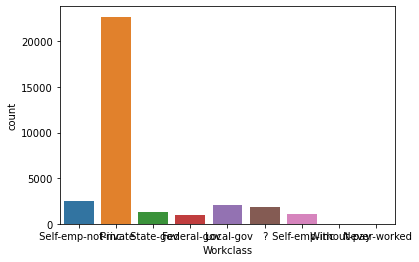

In [9]:
sns.countplot(x='Workclass',data=ci)
print(ci['Workclass'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


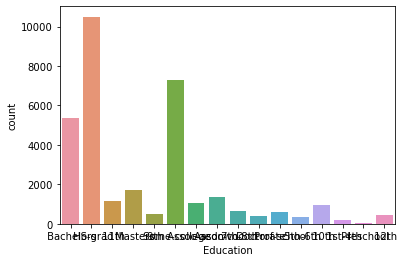

In [10]:
sns.countplot(x='Education',data=ci)
print(ci['Education'].value_counts())

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


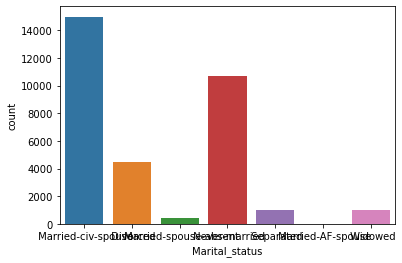

In [11]:
sns.countplot(x='Marital_status',data=ci)
print(ci['Marital_status'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


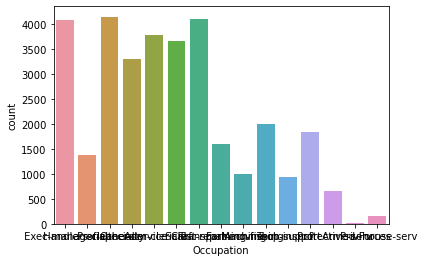

In [12]:
sns.countplot(x='Occupation',data=ci)
print(ci['Occupation'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


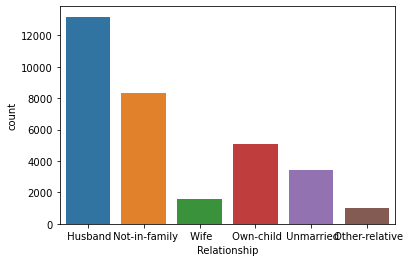

In [13]:
sns.countplot(x='Relationship',data=ci)
print(ci['Relationship'].value_counts())

 Male      21789
 Female    10771
Name: Sex, dtype: int64


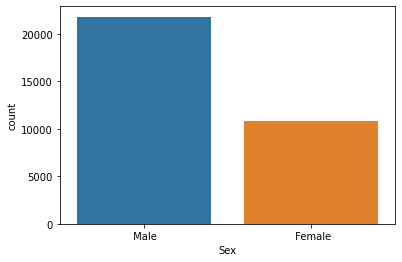

In [14]:
sns.countplot(x='Sex',data=ci)
print(ci['Sex'].value_counts())

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


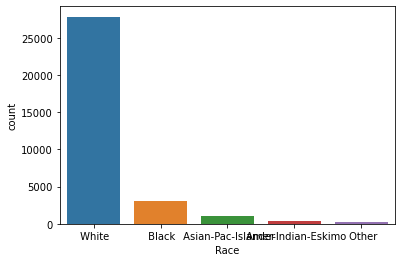

In [15]:
sns.countplot(x='Race',data=ci)
print(ci['Race'].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


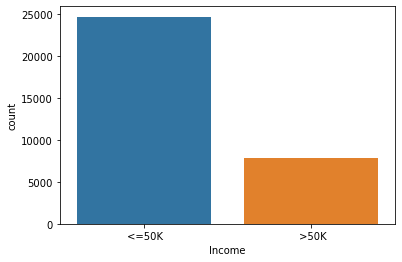

In [16]:
sns.countplot(x='Income',data=ci)
print(ci['Income'].value_counts())

In [17]:
print(ci['Native_country'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

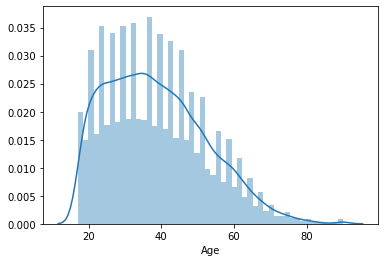

In [18]:
sns.distplot(ci['Age'],kde=True)

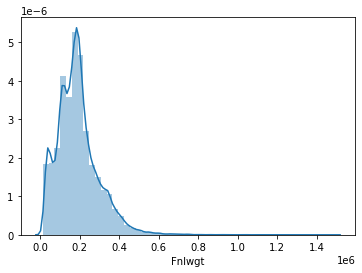

In [19]:
sns.distplot(ci['Fnlwgt'],kde=True)

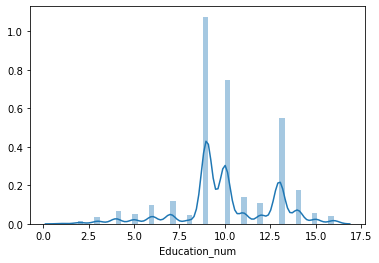

In [20]:
sns.distplot(ci['Education_num'],kde=True)

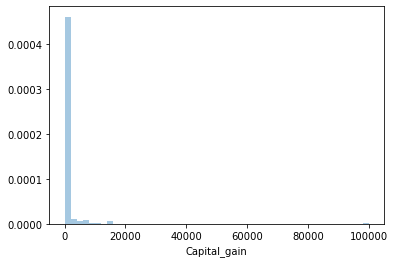

In [21]:
sns.distplot(ci['Capital_gain'],kde=True)

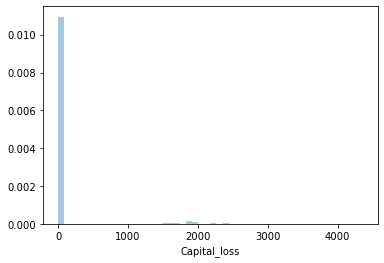

In [22]:
sns.distplot(ci['Capital_loss'],kde=True)

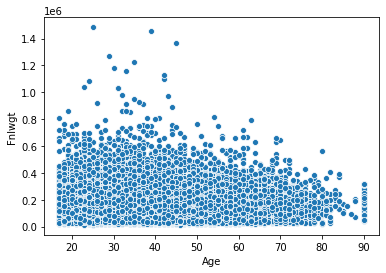

In [23]:
sns.scatterplot(x='Age',y='Fnlwgt',data=ci)

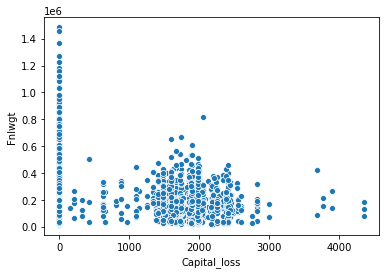

In [24]:
sns.scatterplot(x='Capital_loss',y='Fnlwgt',data=ci)

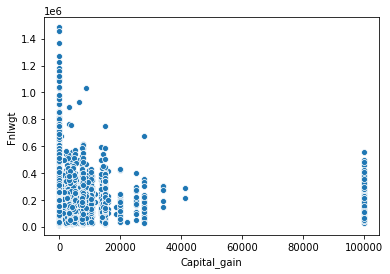

In [25]:
sns.scatterplot(x='Capital_gain',y='Fnlwgt',data=ci)

In [26]:
ci.groupby('Income')['Workclass'].value_counts()

Income  Workclass        
 <=50K   Private             17733
         Self-emp-not-inc     1817
         ?                    1645
         Local-gov            1476
         State-gov             944
         Federal-gov           589
         Self-emp-inc          494
         Without-pay            14
         Never-worked            7
 >50K    Private              4963
         Self-emp-not-inc      724
         Self-emp-inc          622
         Local-gov             617
         Federal-gov           371
         State-gov             353
         ?                     191
Name: Workclass, dtype: int64

In [27]:
ci.groupby('Income')['Education'].value_counts()

Income  Education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3133
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: Education, dtype: int64

In [28]:
ci.groupby('Income')['Marital_status'].value_counts()

Income  Marital_status        
 <=50K   Never-married            10191
         Married-civ-spouse        8284
         Divorced                  3980
         Separated                  959
         Widowed                    908
         Married-spouse-absent      384
         Married-AF-spouse           13
 >50K    Married-civ-spouse        6692
         Never-married              491
         Divorced                   463
         Widowed                     85
         Separated                   66
         Married-spouse-absent       34
         Married-AF-spouse           10
Name: Marital_status, dtype: int64

In [29]:
ci.groupby('Income')['Occupation'].value_counts()

Income  Occupation        
 <=50K   Adm-clerical         3262
         Craft-repair         3170
         Other-service        3158
         Sales                2667
         Prof-specialty       2281
         Exec-managerial      2098
         Machine-op-inspct    1752
         ?                    1652
         Handlers-cleaners    1284
         Transport-moving     1277
         Farming-fishing       879
         Tech-support          645
         Protective-serv       438
         Priv-house-serv       148
         Armed-Forces            8
 >50K    Exec-managerial      1968
         Prof-specialty       1859
         Sales                 983
         Craft-repair          929
         Adm-clerical          507
         Transport-moving      320
         Tech-support          283
         Machine-op-inspct     250
         Protective-serv       211
         ?                     191
         Other-service         137
         Farming-fishing       115
         Handlers-cleaners  

In [30]:
ci.groupby('Income')['Race'].value_counts()

Income  Race               
 <=50K   White                 20698
         Black                  2737
         Asian-Pac-Islander      763
         Amer-Indian-Eskimo      275
         Other                   246
 >50K    White                  7117
         Black                   387
         Asian-Pac-Islander      276
         Amer-Indian-Eskimo       36
         Other                    25
Name: Race, dtype: int64

In [31]:
ci.groupby('Income')['Sex'].value_counts()

Income  Sex    
 <=50K   Male      15127
         Female     9592
 >50K    Male       6662
         Female     1179
Name: Sex, dtype: int64

In [32]:
ci.groupby('Income')['Relationship'].value_counts()

Income  Relationship   
 <=50K   Not-in-family     7448
         Husband           7275
         Own-child         5001
         Unmarried         3228
         Other-relative     944
         Wife               823
 >50K    Husband           5918
         Not-in-family      856
         Wife               745
         Unmarried          218
         Own-child           67
         Other-relative      37
Name: Relationship, dtype: int64

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in ci.columns:
    if ci[i].dtype=="object":
        ci[i]=enc.fit_transform(ci[i].values.reshape(-1,1))

In [34]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


In [35]:
ci.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


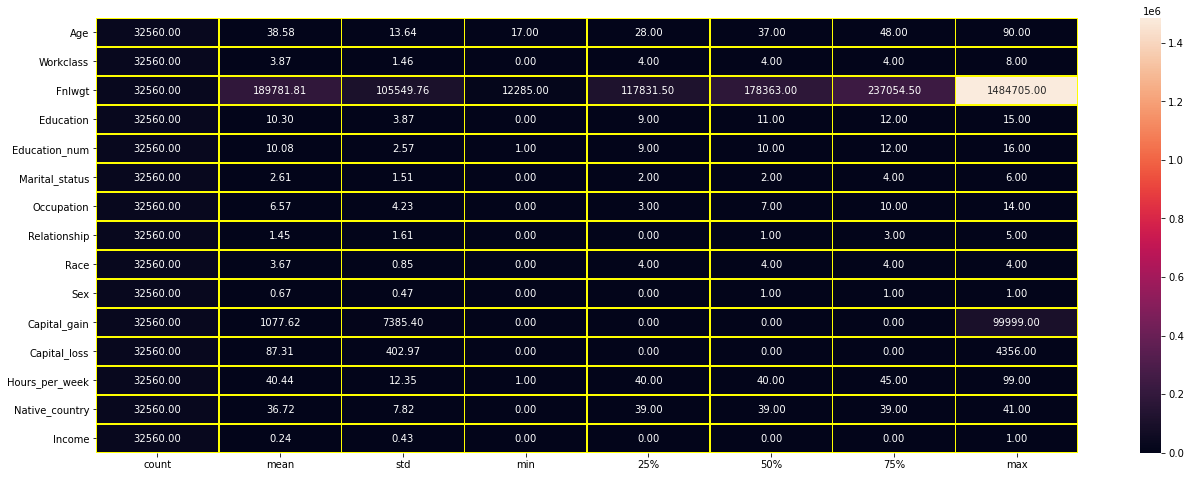

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(ci.describe().T,annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

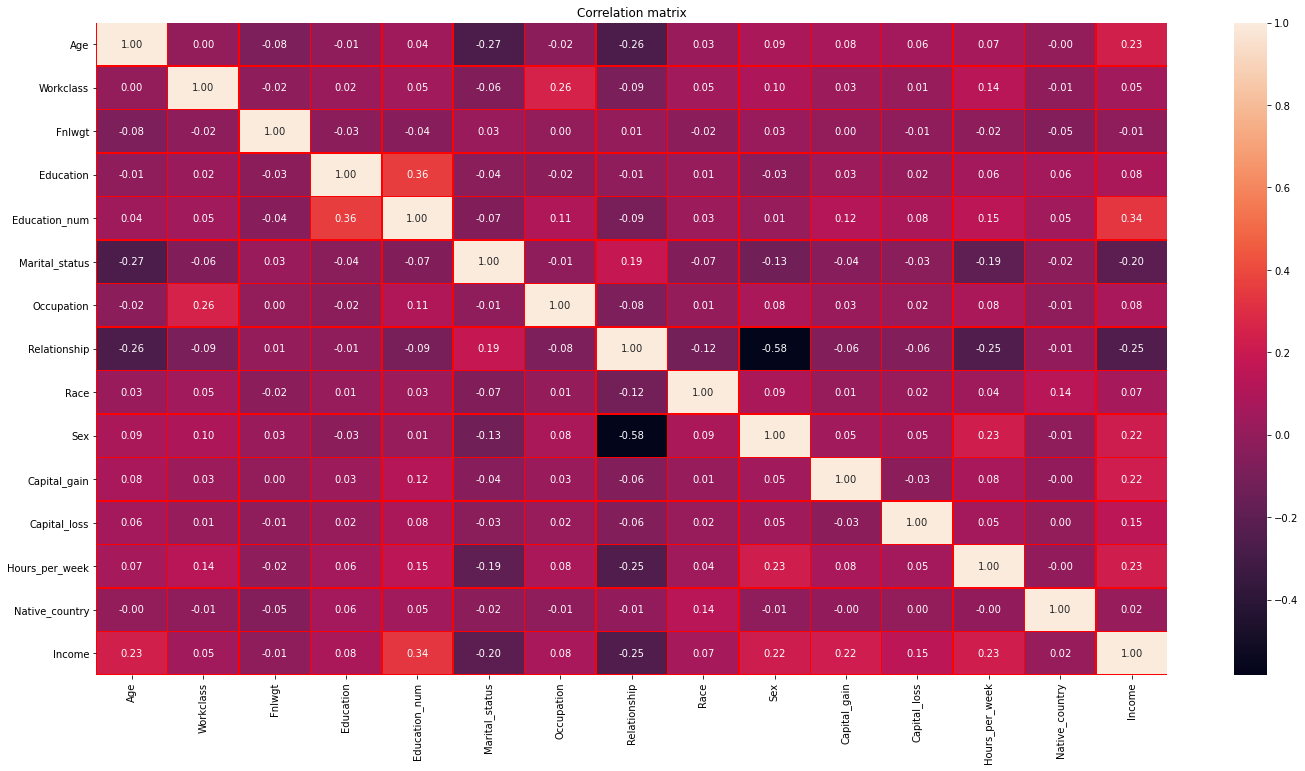

In [37]:
corr=ci.corr()                                               # multivariate analysis
plt.figure(figsize=(24,12))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='red',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

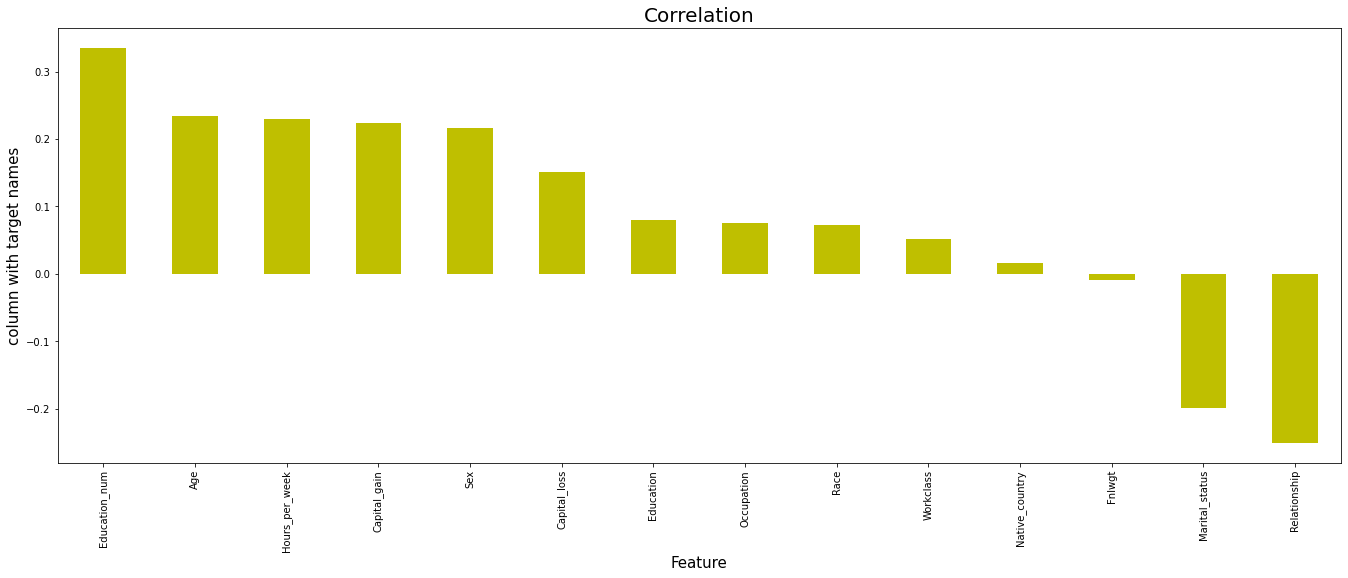

In [38]:
plt.figure(figsize=(23,8))
ci.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

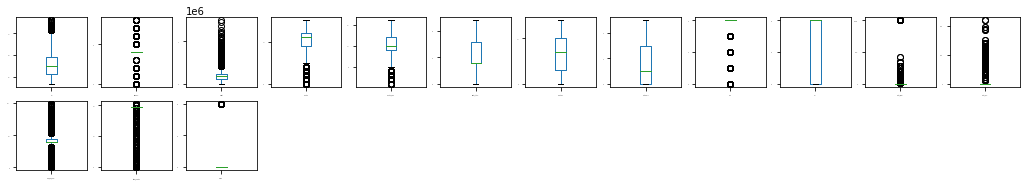

In [39]:
ci.plot(kind='box',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

In [40]:
ci.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

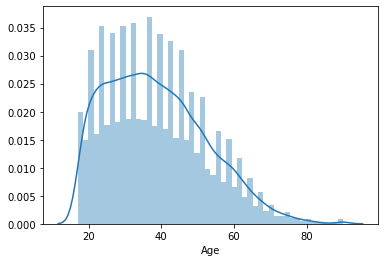

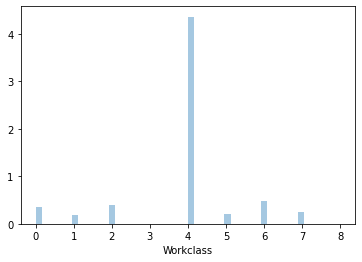

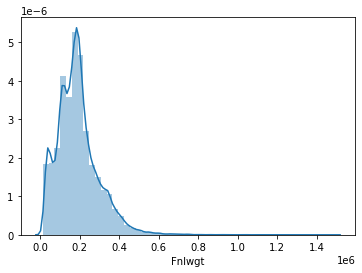

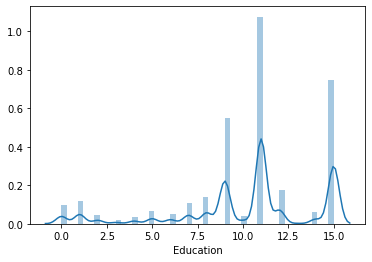

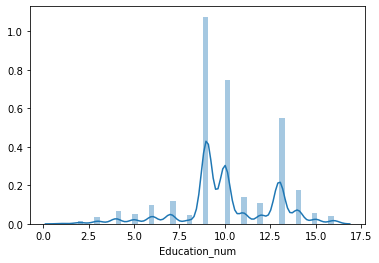

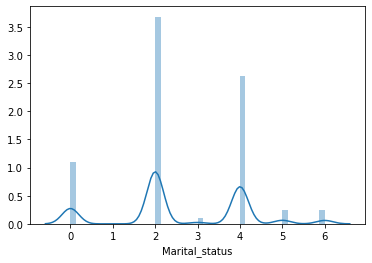

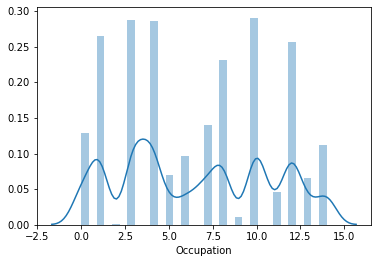

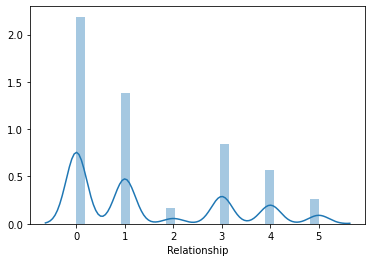

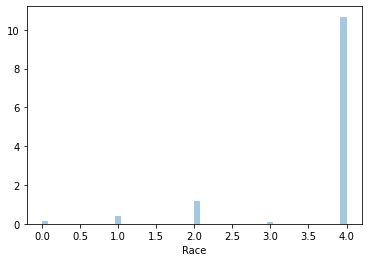

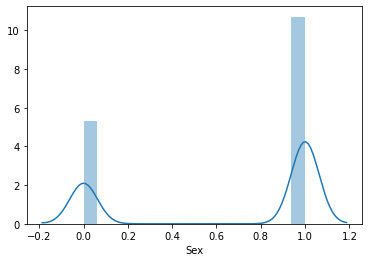

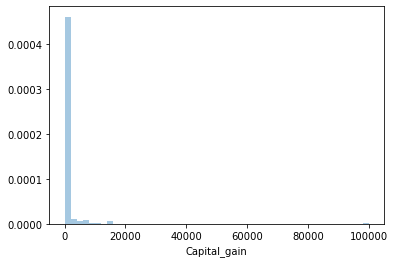

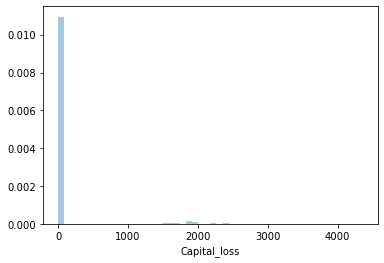

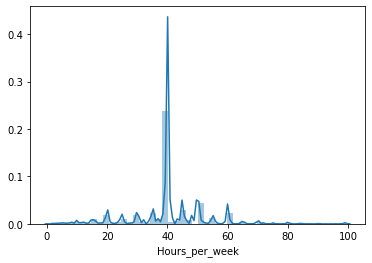

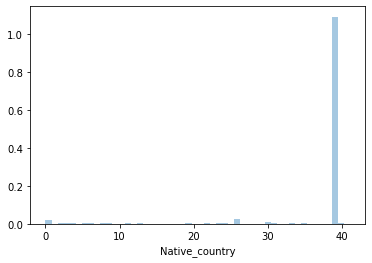

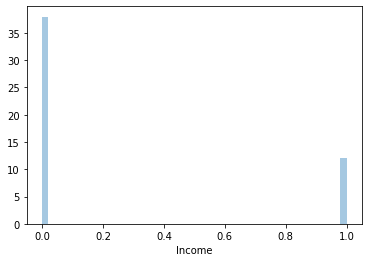

In [41]:
for k in ci.columns:
    plt.figure()
    sns.distplot(ci[k])

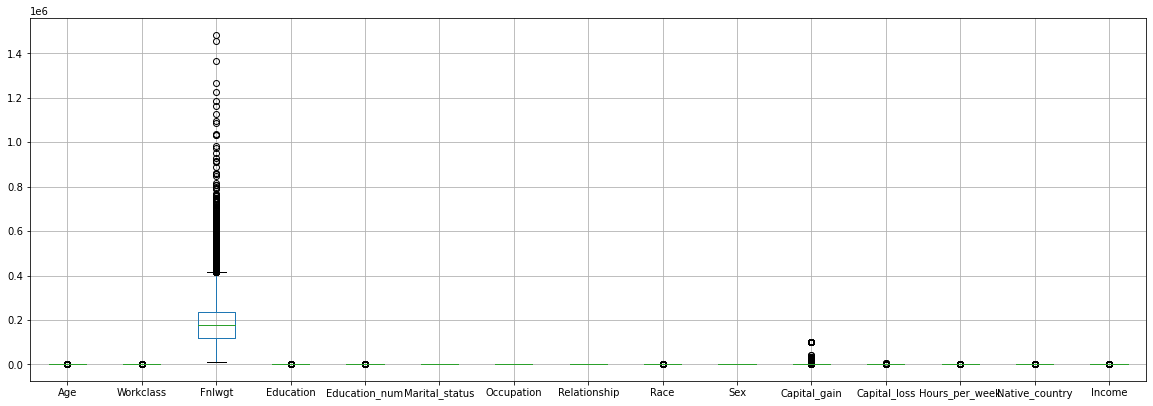

In [42]:
ci.iloc[:,0:15].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [43]:
x=ci.drop(['Income'],axis=1)
y=ci['Income']

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(32560, 14)

In [45]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [46]:
z[32552][8]

3.1407120742466126

In [47]:
z[10][8]

3.1407120742466126

In [48]:
x_new=x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(32560, 14)
(27417, 14)


In [49]:
loss=((32560-27417)/32560)*100
loss

15.795454545454547

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [51]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.8251279664960447 on Random_state  1
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8280130293159609 on Random_state  2
Best Accuracy is  0.8310842252210331 on Random_state  15
Best Accuracy is  0.8310842252210331 on Random_state  15
Best Accuracy is  0.8310842252210331 on Random_state  15
Best Accuracy is  0.8310842252210331 on Rando

Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.8317356910190786 on Random_state  53
Best Accuracy is  0.83173569101

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=53)

In [53]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8302211302211302
[[5838  373]
 [1009  920]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      6211
         1.0       0.71      0.48      0.57      1929

    accuracy                           0.83      8140
   macro avg       0.78      0.71      0.73      8140
weighted avg       0.82      0.83      0.82      8140



In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8143734643734644
[[5425  786]
 [ 725 1204]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      6211
         1.0       0.61      0.62      0.61      1929

    accuracy                           0.81      8140
   macro avg       0.74      0.75      0.75      8140
weighted avg       0.82      0.81      0.82      8140



In [55]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8529484029484029
[[5854  357]
 [ 840 1089]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      6211
         1.0       0.75      0.56      0.65      1929

    accuracy                           0.85      8140
   macro avg       0.81      0.75      0.78      8140
weighted avg       0.85      0.85      0.85      8140



In [56]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8641277641277642
[[5823  388]
 [ 718 1211]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      6211
         1.0       0.76      0.63      0.69      1929

    accuracy                           0.86      8140
   macro avg       0.82      0.78      0.80      8140
weighted avg       0.86      0.86      0.86      8140



In [57]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
predgn=gn.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.8067567567567567
[[5880  331]
 [1242  687]]
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88      6211
         1.0       0.67      0.36      0.47      1929

    accuracy                           0.81      8140
   macro avg       0.75      0.65      0.67      8140
weighted avg       0.79      0.81      0.78      8140



In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8337837837837838
[[5639  572]
 [ 781 1148]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      6211
         1.0       0.67      0.60      0.63      1929

    accuracy                           0.83      8140
   macro avg       0.77      0.75      0.76      8140
weighted avg       0.83      0.83      0.83      8140



In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8604422604422605
[[5765  446]
 [ 690 1239]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6211
         1.0       0.74      0.64      0.69      1929

    accuracy                           0.86      8140
   macro avg       0.81      0.79      0.80      8140
weighted avg       0.86      0.86      0.86      8140



In [60]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.825061425061425


In [61]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8074938574938575


In [62]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8482800982800983


In [63]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8588144963144962


In [64]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8035012285012286


In [65]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8274570024570025


In [66]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rfc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.856418918918919


minimum difference is accuracy and cross validation score is for RandomForestclassifier so this is our best model.

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.86007371007371
[[5763  448]
 [ 691 1238]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6211
         1.0       0.73      0.64      0.68      1929

    accuracy                           0.86      8140
   macro avg       0.81      0.78      0.80      8140
weighted avg       0.86      0.86      0.86      8140



In [68]:
import joblib
joblib.dump(rfc,'censusincomemodel.pkl')

['censusincomemodel.pkl']